- Faire un dendogramme afin de choisir le meilleur nombre de clusters
- Est-il pertinent de faire des groupements en se basant sur les features ResNet des oiseaux

# --- CLIMAT & BACKGROUND ANALYSIS NOTEBOOK ---

## Objectif : Réaliser une stratification climatique et analyser les features visuelles des oiseaux en lien avec leur environnement.

In [4]:


# ✅ Section 1 : Imports & Chargement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [58]:

# Remplace 'chemin_vers_ton_fichier.csv' par le chemin de ton fichier CSV
df_features = pd.read_csv('../../Donnees/birds_features.csv')
df_coords = pd.read_csv('../../Donnees/climate_coordinates_data.csv')
# Exemple : Fusionner les deux DataFrames sur une colonne 'ID' (ajuster selon ton cas)
df= pd.merge(df_features, df_coords, on='image_name', how='inner')
df.reset_index(inplace=True, drop=True)


In [60]:
# Si nécessaire, enlève les colonnes inutiles
# Par exemple, si 'nom' ou 'espèce' sont présentes, tu peux les enlever
df = df.drop(['species_x', 'Unnamed: 0_x','Unnamed: 0_y', 'species_x'], axis=1)
df = df.rename(columns={"species_y": "species"})
df

,image_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2045,f2046,f2047,f2048,species,climate_var1,climate_var2,climate_var3,latitude,longitude
0,Hemiphaga_novaeseelandiae_3,0.350260,0.006831,0.012756,0.000000,0.013939,0.053352,0.088114,0.016191,0.340918,...,0.000000,0.000000,0.000000,0.383120,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.138815,176.543908
1,Hemiphaga_novaeseelandiae_2,0.000000,0.005416,0.017902,0.000000,0.051494,0.000000,0.006187,0.041856,0.066160,...,0.000000,0.003290,0.000000,0.099105,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.404742,176.593951
2,Hemiphaga_novaeseelandiae_1,0.000000,0.006752,0.038978,0.000000,0.000860,0.030378,0.054930,0.022035,0.356346,...,0.000000,0.047051,0.000000,0.137070,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-39.800397,176.973603
3,Hemiphaga_novaeseelandiae_5,0.000000,0.047981,0.018533,0.000000,0.013356,0.009574,0.052967,0.000000,0.000000,...,0.040853,0.000000,0.000000,0.291787,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-43.667030,172.787965
4,Hemiphaga_novaeseelandiae_4,0.000000,0.007569,0.000119,0.001641,0.264834,0.010646,0.056266,0.015080,0.394821,...,0.000000,0.000000,0.000000,0.258710,Hemiphaga_novaeseelandiae,Polar,Tundra,NaN,-44.808080,167.771025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,Larus_occidentalis_4,0.106483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018393,...,0.000000,0.000000,0.000000,0.014820,Larus_occidentalis,Arid,Steppe,Cold,32.850955,-117.273108
856,Thryomanes_bewickii_2,0.059418,0.000000,0.029876,0.000000,0.038954,0.000000,0.272748,0.000000,0.007823,...,0.000000,0.004270,0.000000,0.000000,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.412419,-97.901376
857,Thryomanes_bewickii_3,0.047502,0.000000,0.000000,0.000000,0.000000,0.000000,0.152380,0.000000,0.001274,...,0.000000,0.000000,0.000000,0.009607,Thryomanes_bewickii,Temperate,Warm summer,Dry winter,19.668299,-99.018800
858,Thryomanes_bewickii_4,0.000000,0.000000,0.000000,0.048386,0.001224,0.000000,0.000000,0.023684,0.000000,...,0.000000,0.000000,0.000000,0.000000,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.413227,-97.901283


In [62]:
# ✅ Section 2 : KMeans sur les coordonnées (stratification climat proxy)
# --- Standardisation des coordonnées
scaler = StandardScaler()
coords_scaled = StandardScaler().fit_transform(df[['latitude', 'longitude']])

# --- KMeans avec k=30
kmeans = KMeans(n_clusters=30, random_state=42)
df['cluster'] = kmeans.fit_predict(coords_scaled)

# --- Optionnel : silhouette score
score = silhouette_score(coords_scaled, df['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.546


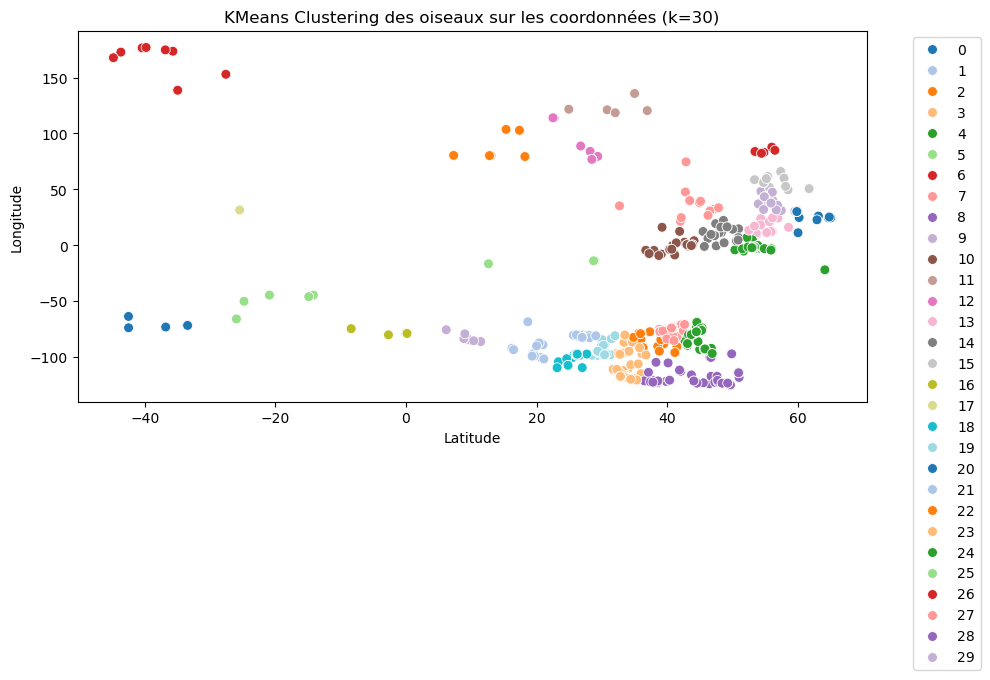

In [64]:
# ✅ Section 3 : Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='cluster', palette='tab20', s=50)
plt.title("KMeans Clustering des oiseaux sur les coordonnées (k=30)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

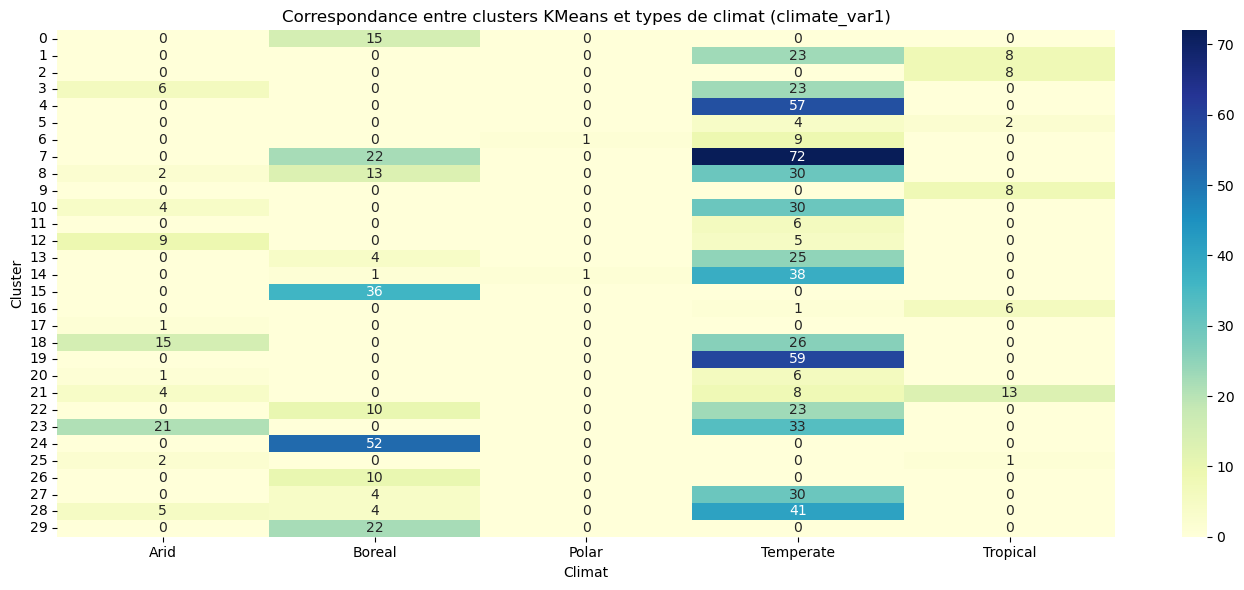

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df['cluster'], df['climate_var1'])

plt.figure(figsize=(14, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Correspondance entre clusters KMeans et types de climat (climate_var1)")
plt.ylabel("Cluster")
plt.xlabel("Climat")
plt.tight_layout()
plt.show()


In [68]:
# 1. Sélection des colonnes de features (2048 colonnes)
features = df[[f"f{i}" for i in range(1, 2049)]]

# 2. Lancement de t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(features)

# 3. Création du df_tsne
df_tsne = pd.DataFrame({
    'image_name': df['image_name'],
    'tsne_1': tsne_result[:, 0],
    'tsne_2': tsne_result[:, 1]
})


In [69]:
df_final = pd.merge(df_tsne, 
                    df[['image_name', 'cluster', 'climate_var1', "climate_var2", "climate_var3", 'species']], 
                    on='image_name', 
                    how='left')


Colonnes disponibles : ['species', 'climate_var1', 'climate_var2', 'climate_var3', 'latitude', 'longitude', 'cluster']


Choisissez une colonne pour la couleur:  cluster


Coloration basée sur : 'cluster' (exemples : [ 6 13 10 14  1])


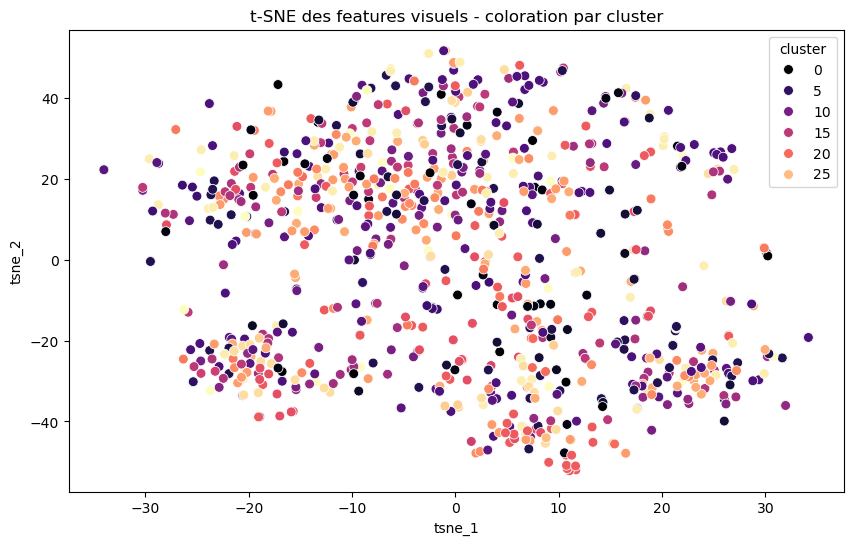

In [134]:
# Demander à l'utilisateur quel champ utiliser comme hue
print("Colonnes disponibles :", list(df.columns[2049:]))
hue_col = input("Choisissez une colonne pour la couleur: ")

# Afficher les premiers éléments pour vérifier
print(f"Coloration basée sur : '{hue_col}' (exemples : {df_final[hue_col].unique()[:5]})")
# Choix automatique de la palette
if pd.api.types.is_numeric_dtype(df_final[hue_col]):
    palette = 'magma'  # palette séquentielle ou divergente
else:
    palette = 'Set2'  # palette catégorielle

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x='tsne_1',
    y='tsne_2',
    hue= hue_col,
    palette= palette,
    s=50
)
plt.title("t-SNE des features visuels - coloration par cluster")
plt.show()


In [110]:
df.columns[2049:]

Index(['species', 'climate_var1', 'climate_var2', 'climate_var3', 'latitude',
       'longitude', 'cluster'],
      dtype='object')

Colonnes disponibles : Index(['species', 'climate_var1', 'climate_var2', 'climate_var3', 'latitude',
       'longitude', 'cluster'],
      dtype='object')


Choisissez la colonne pour l'axe X (ex: cluster, climate_var1, species) :  species
Choisissez la colonne pour la couleur (hue) (ex: climate_var1, species, habitat) :  cluster


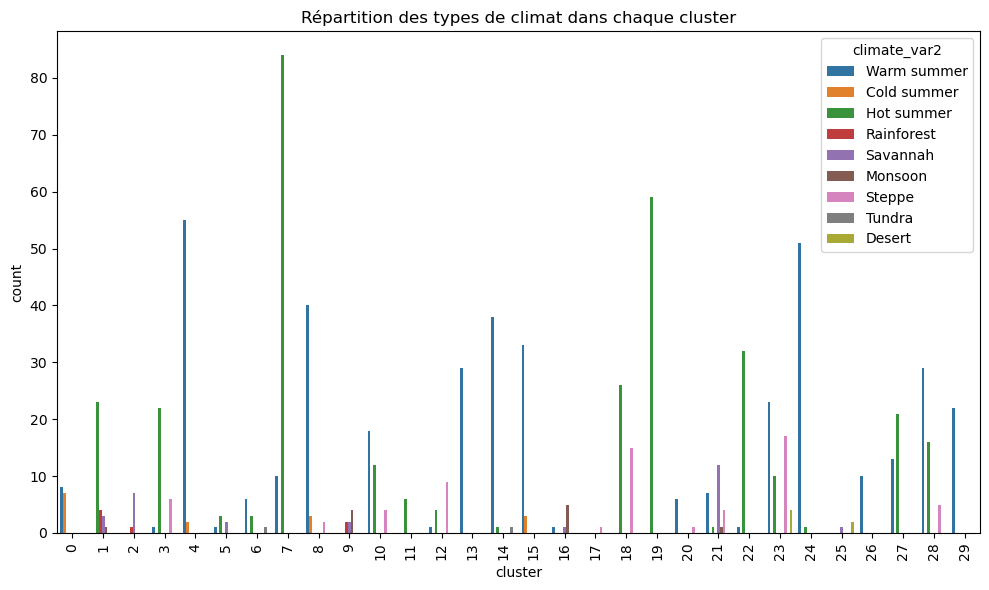

In [112]:
# ✅ Section 4 : Comparaison avec les climats connus
print("Colonnes disponibles :", df.columns[2049:])

x_col = input("Choisissez la colonne pour l'axe X (ex: cluster, climate_var1, species) : ")
hue_col = input("Choisissez la colonne pour la couleur (hue) (ex: climate_var1, species, habitat) : ")


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', hue='climate_var2')
plt.title("Répartition des types de climat dans chaque cluster")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [116]:
# ✅ Section 5 : Analyse statistique des clusters
cluster_summary = df.groupby('cluster').agg({
    'image_name': 'count',
    'species': pd.Series.nunique,
    'climate_var1': pd.Series.nunique
}).rename(columns={
    'image_name': 'nb_images',
    'species': 'nb_species',
    'climate_var1': 'nb_climates'
})
print(cluster_summary)

         nb_images  nb_species  nb_climates
cluster                                    
0               15          14            1
1               31          20            2
2                8           6            1
3               29          23            2
4               57          41            1
5                6           3            2
6               10           2            2
7               94          52            2
8               45          32            3
9                8           6            1
10              34          21            2
11               6           6            1
12              14           8            2
13              29          20            2
14              40          29            3
15              36          25            1
16               7           6            2
17               1           1            1
18              41          29            2
19              59          39            1
20               7           4  

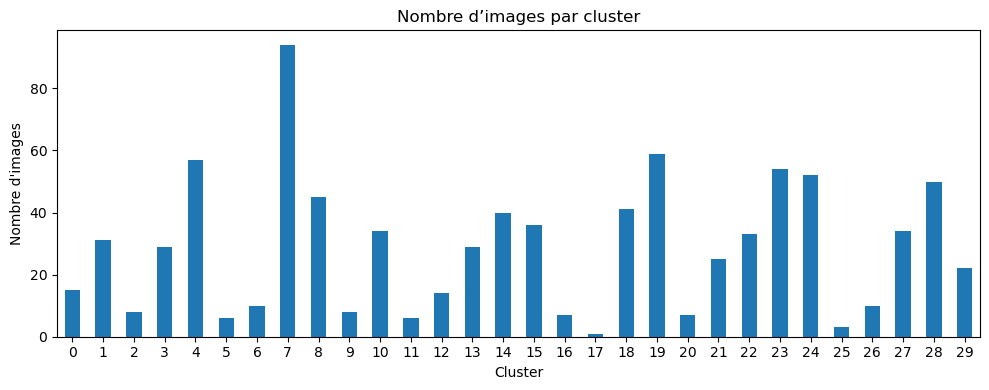

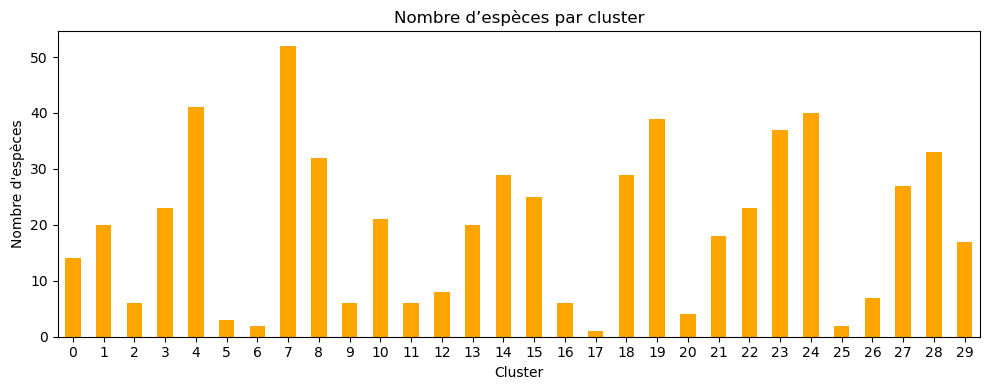

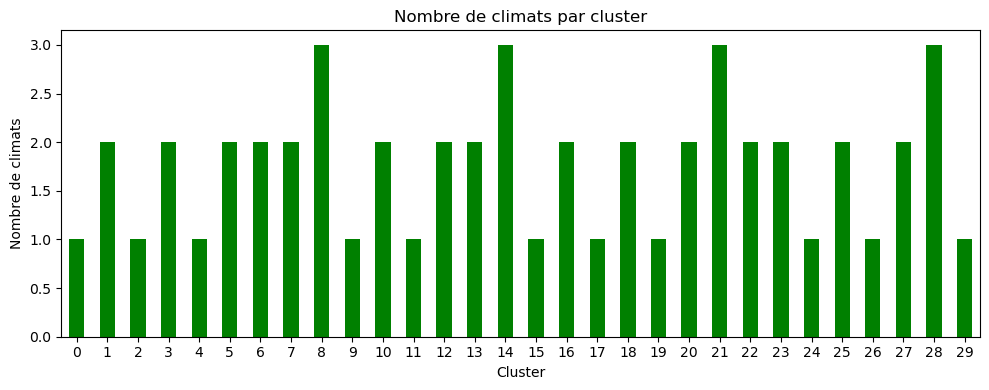

In [118]:
# Plot number of images per cluster
cluster_summary['nb_images'].plot(kind='bar', figsize=(10, 4), title='Nombre d’images par cluster')
plt.ylabel("Nombre d'images")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot number of species per cluster
cluster_summary['nb_species'].plot(kind='bar', figsize=(10, 4), color='orange', title='Nombre d’espèces par cluster')
plt.ylabel("Nombre d'espèces")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot number of climates per cluster
cluster_summary['nb_climates'].plot(kind='bar', figsize=(10, 4), color='green', title='Nombre de climats par cluster')
plt.ylabel("Nombre de climats")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [122]:
# ✅ Section 6 : t-SNE sur les features visuelles (si disponibles)
# --- Remplacer par le chemin vers ton CSV de features ResNet (avec image_name pour merge)
# features_df = pd.read_csv("../../Donnees/birds_features.csv")
# merged = df.merge(features_df, on="image_name")

features = df[[f"feature_{i+1}" for i in range(2048)]]
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features)
merged['tsne_1'] = tsne_result[:, 0]
merged['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='tsne_1', y='tsne_2', hue='cluster', palette='tab20', s=40)
plt.title("t-SNE des features ResNet - coloration par cluster")
plt.show()

KeyError: "None of [Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',\n       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',\n       ...\n       'feature_2039', 'feature_2040', 'feature_2041', 'feature_2042',\n       'feature_2043', 'feature_2044', 'feature_2045', 'feature_2046',\n       'feature_2047', 'feature_2048'],\n      dtype='object', length=2048)] are in the [columns]"

In [ ]:
# ✅ Section 7 : Analyse des outliers
# --- Ajouter des outils type LOF, DBSCAN, ou juste visualisation

In [ ]:
# ✅ Section 8 : Cartographie (si carte du monde / fond disponible)
# fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='cluster', hover_name='species')
# fig.update_layout(title="Distribution géographique des clusters")
# fig.show()

In [ ]:
# ✅ Section :9 : Idées pour la suite
# - Analyse des fonds d'image par similarité visuelle
# - Comparaison des motifs (plumage vs background)
# - UMAP / PCA pour la compréhension visuelle
# - Exploration interactivité (Streamlit, Plotly Dash...)



## Stratification en utilisant les features ResNet